In [1]:
%pip install numpy pandas matplotlib seaborn ipython jupyterlab tensorflow scikit-learn fastdtw tslearn


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\Alejo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np

o_player_sequences, _ = np.load("trajectories.npy",allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'trajectories.npy'

In [3]:
import tensorflow as tf


o_player_dense= []
for seq in o_player_sequences:
    new_seq = [np.array([x[0],x[1]]) for x in seq]
    o_player_dense.append(np.array(new_seq))
o_player_dense = np.array(o_player_dense,dtype=object)

padding_value = [0,0]
padded_o_seq = tf.keras.preprocessing.sequence.pad_sequences(o_player_dense,padding='post', value=padding_value, dtype='float32',maxlen = 90)


In [4]:
print(o_player_dense.shape)

(17187,)


In [12]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

K = 8
o_player_dense_transformed = to_time_series_dataset(padded_o_seq)
model = TimeSeriesKMeans(n_clusters=K, verbose=False, random_state=0,n_jobs=-1,init='random',metric="dtw")
model.fit(o_player_dense_transformed)


TimeSeriesKMeans(init='random', metric='dtw', n_clusters=8, n_jobs=-1,
                 random_state=0, verbose=False)

In [17]:
from tslearn.utils import to_time_series

cluster_centers = model.cluster_centers_
cluster_centers = to_time_series(cluster_centers)
cluster_centers.shape

(8, 90, 2)

In [18]:
from sklearn.metrics.pairwise import euclidean_distances


distances = model.transform(o_player_dense_transformed)
cluster_labels = model.predict(o_player_dense_transformed)

print(distances[0])
print(cluster_labels[0])
sequences_ordered = [[] for i in range(K)]
for i in range(len(distances)):
    closest_center = cluster_labels[i]
    distance = distances[i][closest_center]
    sequences_ordered[closest_center].append((distance,i))



for i in range(len(sequences_ordered)):
    lst = sequences_ordered[i]
    lst = sorted(lst)
    sequences_ordered[i] = lst




[45.04308292 20.55570999 39.24617797 62.82012262 18.73444476 29.171641
 37.64340815 13.02477338]
7


In [19]:
print(len(sequences_ordered[0]))
print(len(sequences_ordered[1]))


3311
4035


Drawing out top 3 examples for cluster center 0
(3.2954403480993486, 4849)


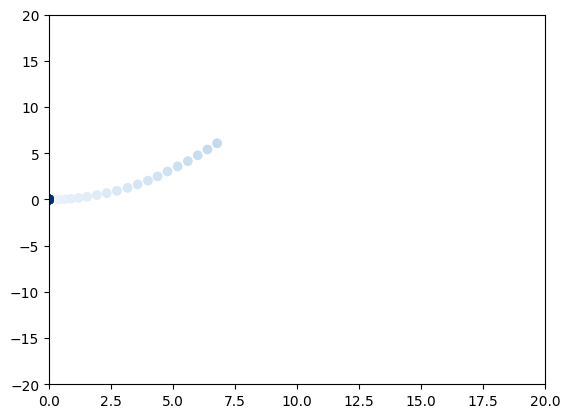

(3.3510561982499545, 1476)


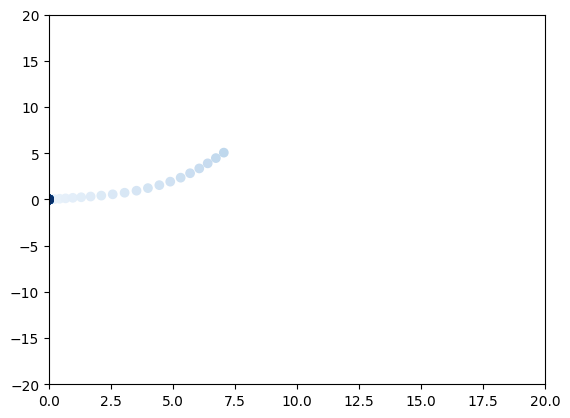

(3.358583741553639, 6847)


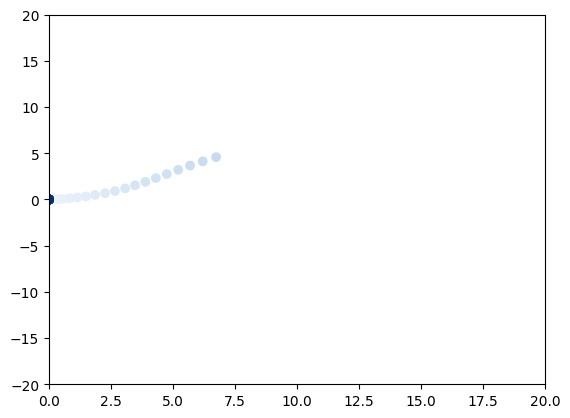

Drawing out top 3 examples for cluster center 1
(3.8570636392203856, 15189)


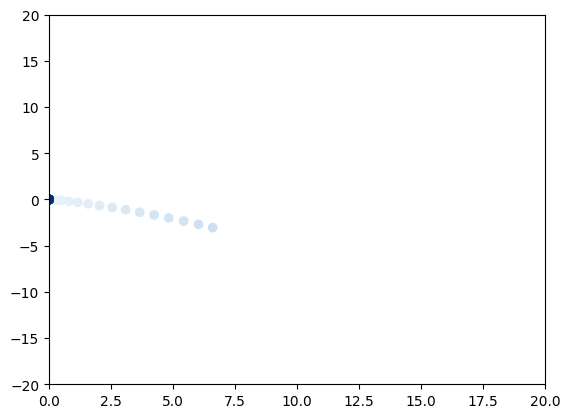

(3.905887439255627, 4344)


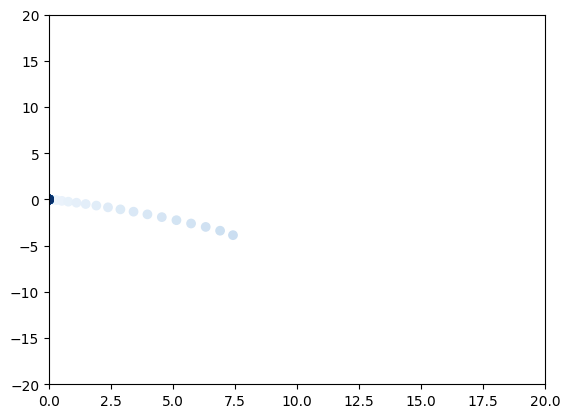

(3.9548338545899724, 5645)


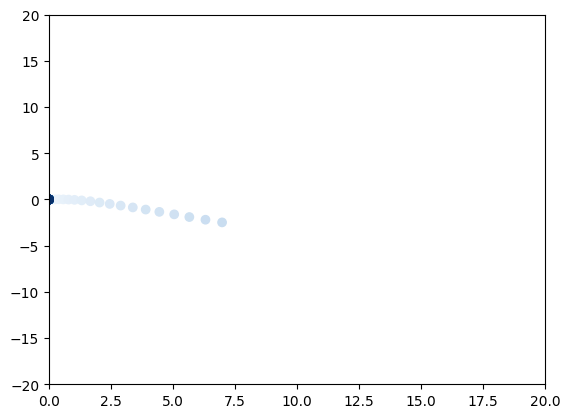

Drawing out top 3 examples for cluster center 2
(5.78586566831039, 12409)


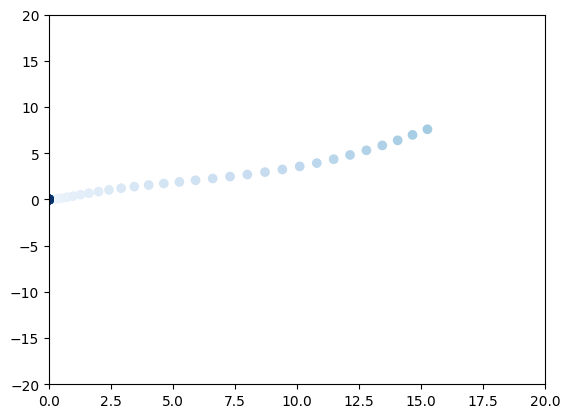

(5.832586203537292, 5364)


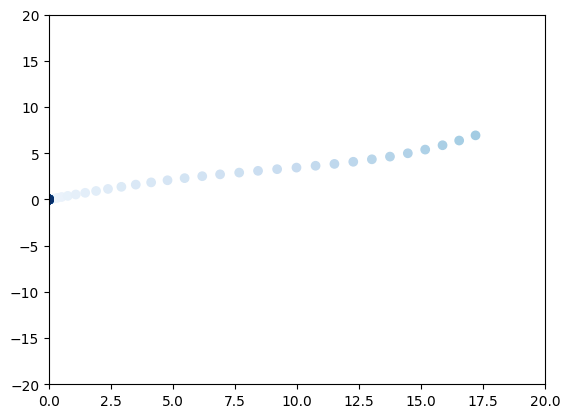

(6.021166668350344, 1301)


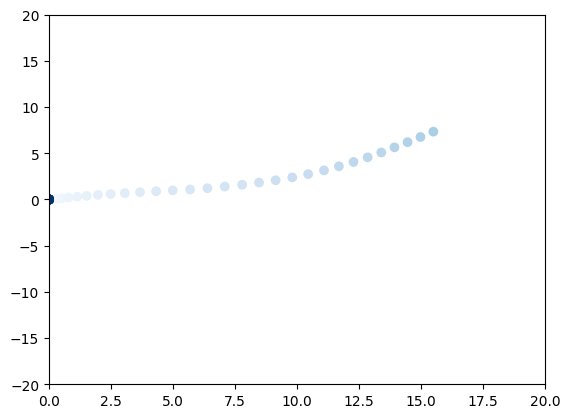

Drawing out top 3 examples for cluster center 3
(9.357035055841896, 9560)


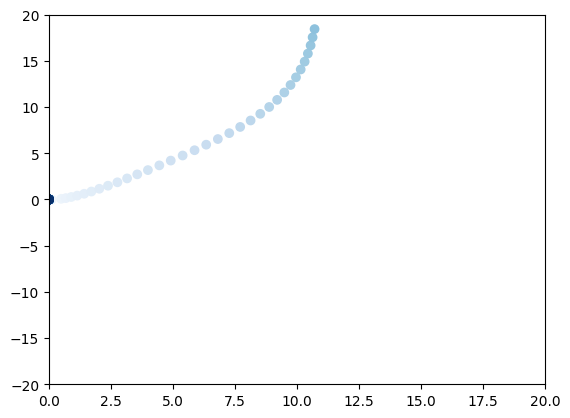

(9.367631510817297, 7762)


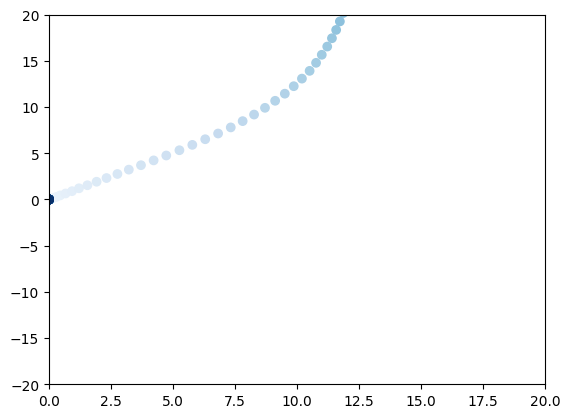

(9.512241943046915, 12740)


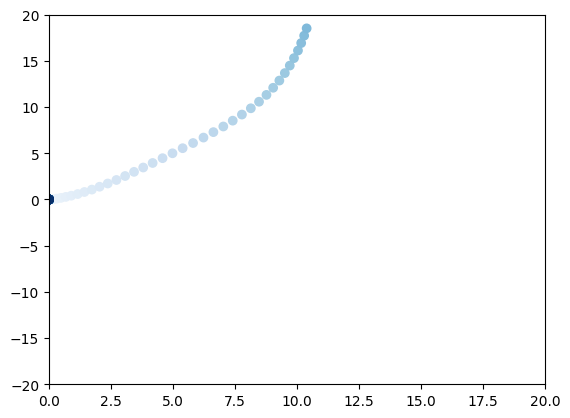

Drawing out top 3 examples for cluster center 4
(3.2741301427931395, 4228)


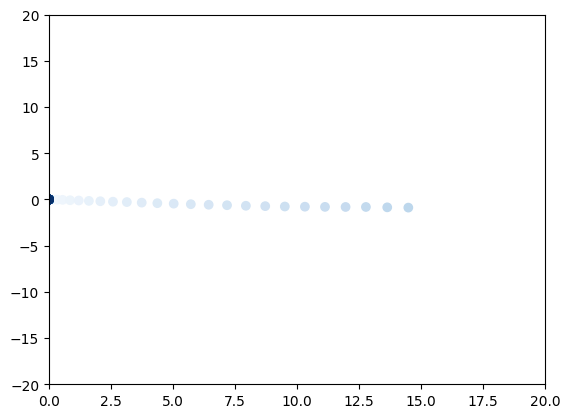

(3.3366165218880393, 6396)


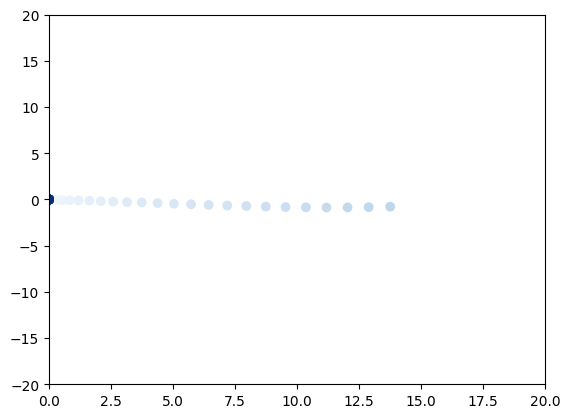

(3.365003759926547, 10618)


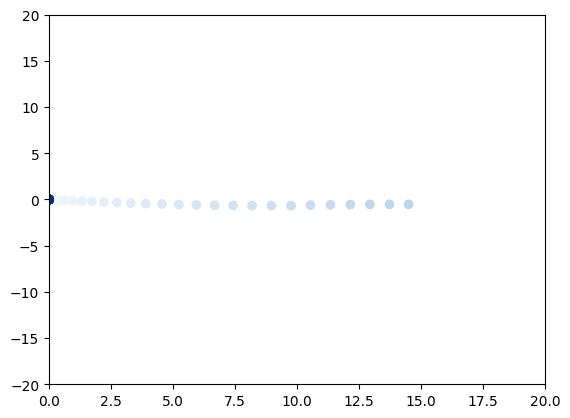

Drawing out top 3 examples for cluster center 5
(5.690796174646137, 2437)


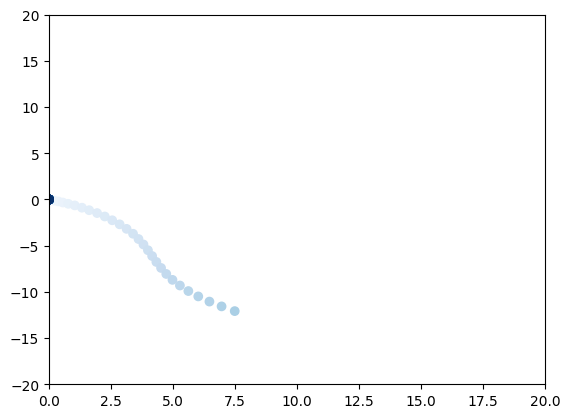

(5.724628213210847, 8885)


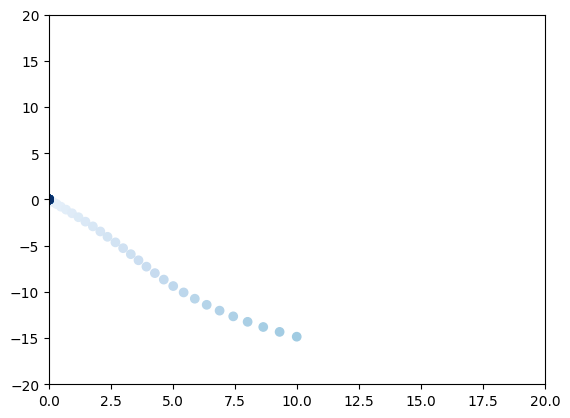

(5.853233690965572, 3594)


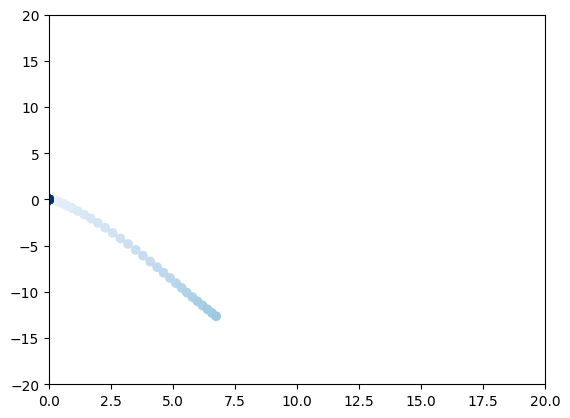

Drawing out top 3 examples for cluster center 6
(10.462760480409845, 6774)


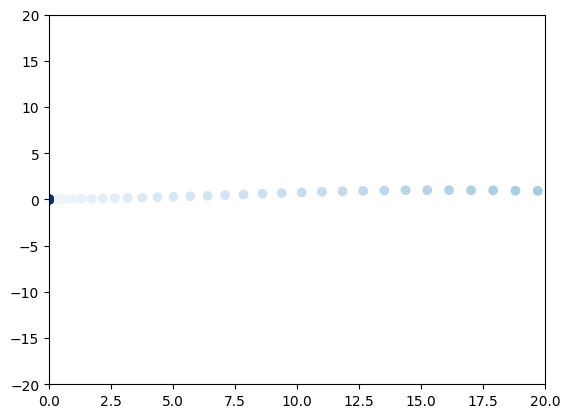

(10.49934899672866, 11009)


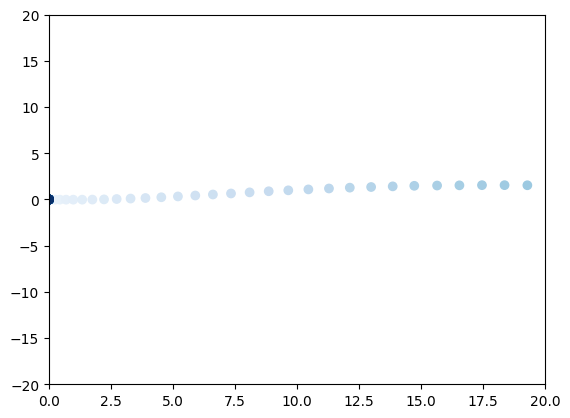

(10.658843906445622, 398)


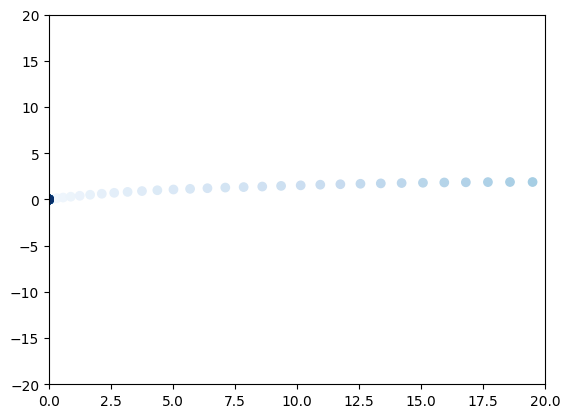

Drawing out top 3 examples for cluster center 7
(6.600981196298953, 2150)


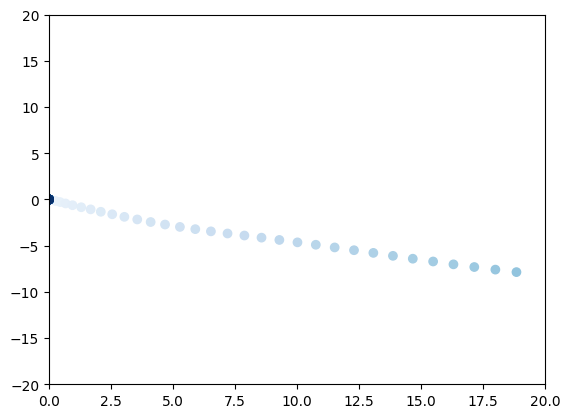

(6.631468333344626, 13535)


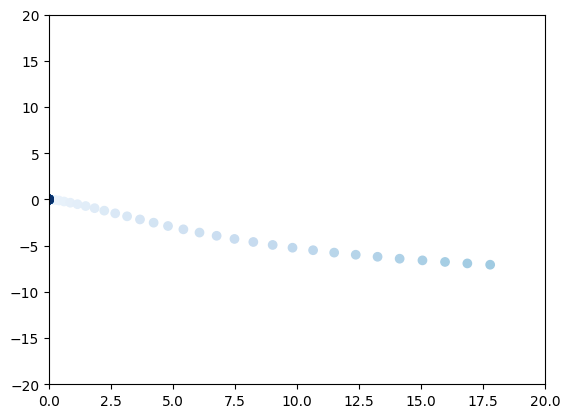

(6.7854615622175745, 5711)


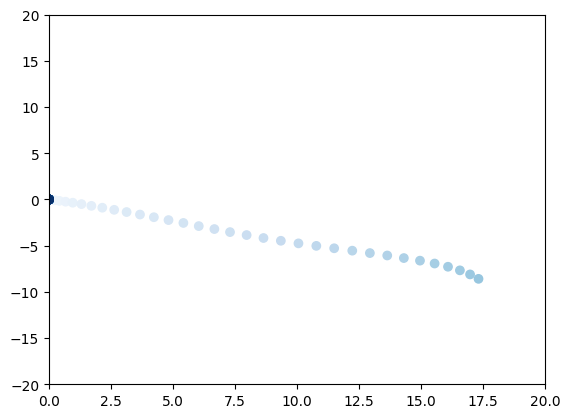

In [20]:
import matplotlib.pyplot as plt
for i in range(len(sequences_ordered)):
    print(f"Drawing out top 3 examples for cluster center {i}")
    cluster = sequences_ordered[i]
    for i in range(3):
        tup = cluster[i]
        print(tup)
        current_index = tup[1]
        seq = o_player_dense_transformed[current_index]
        x = [x[0] for x in seq]
        y = [x[1] for x in seq]
        c = np.linspace(0, 1, len(x))

        plt.scatter(x,y, c = c,cmap='Blues')
        plt.ylim(-20, 20)
        plt.xlim(0, 20)
        plt.show()